In [2]:
# step 1: load the data

# Data Manipulation
import pandas as pd
import numpy as np

# DataViz
import matplotlib.pyplot as plt


#path = r"P:\DATA 5000\aging.csv"
path = r"C:\Users\enmao\OneDrive - Carleton University\DATA 5000\aging.csv"
df = pd.read_csv(path)
df = pd.DataFrame(df)

df = df[['unemp', 'pop_retire', "cpi", "deflator",'ln_prgdp', 'growth_prgdp', 'labor', 'labor_1', 'cpi_5geo', 'deflator_5geo',
              'ln_prgdp_1', 'growth_prgdp_1', 'pop_retire_1', 'unemp_1']]
#df = df[['unemp', 'pop_retire', "cpi", "deflator",'ln_prgdp', 'growth_prgdp', 'labor']]

#target = df['unemp']

# fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)


df.head(5)


,unemp,pop_retire,cpi,deflator,ln_prgdp,growth_prgdp,labor,labor_1,cpi_5geo,deflator_5geo,ln_prgdp_1,growth_prgdp_1,pop_retire_1,unemp_1
0,8.6,0.157353,9.048068,15.155654,7.477395,12.180710,66.6,66.5,13.289716,14.428472,7.355588,0.097955,0.153210,9.1
1,8.8,0.029753,-3.099781,-0.614074,5.993728,-0.981045,53.2,53.0,1.353519,3.674483,6.003539,0.041044,0.030504,8.6
2,5.1,0.033359,0.233647,1.508500,6.821986,1.060820,69.9,69.8,2.186619,2.179810,6.811378,0.013683,0.033561,6.0
3,7.9,0.073249,5.709205,-2.917119,8.587699,2.933693,49.3,49.0,6.424401,0.679993,8.558362,-0.017599,0.072188,8.5
4,6.3,0.152512,3.589027,3.316218,9.769965,4.195595,70.0,67.4,7.292399,6.781683,9.728009,0.027425,0.149885,6.7


In [3]:
# step 2: data normalization
from sklearn.preprocessing import StandardScaler

# our target variable is 'unemp'
y = df['unemp']
X = df.drop('unemp', axis=1)

#features = df[['pop_retire', "cpi", "deflator",'ln_prgdp', 'growth_prgdp', 'labor', 'labor_1', 'cpi_5geo', 'deflator_5geo',
#              'ln_prgdp_1', 'growth_prgdp_1', 'pop_retire_1', 'unemp_1']]

# Z-score the features
X = StandardScaler().fit_transform(X)



In [4]:
# step 3: The PCA model
from sklearn.decomposition import PCA

pca = PCA(n_components=8) # choose 8 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space


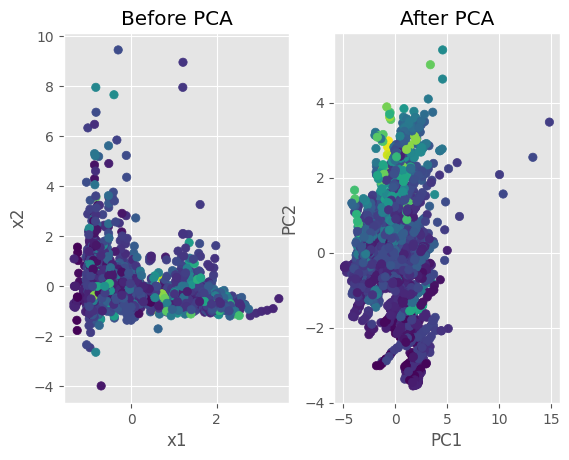

In [5]:
plt.style.use('ggplot')

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [6]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
sum = 0
for value in explained_variance:
    sum += value
print(sum)

[0.30759637 0.17322061 0.14569642 0.08253005 0.07710222 0.07047679
 0.0620101  0.04440743]
0.9630399918580123


In [ ]:
"""
We can see that in the PCA space, the maximized variance along PC1 explains 30%
of the variance. 
All the 8 PCs explain 96%.
"""

In [16]:
np.cov(X_new.T)

array([[ 4.00072949e+00, -1.42073424e-15],
       [-1.42073424e-15,  2.25298107e+00]])

In [17]:
pca.explained_variance_

array([4.00072949, 2.25298107])

In [18]:
print(abs( pca.components_ ))

[[0.40302018 0.2847776  0.25371128 0.42353731 0.10058647 0.05123539
  0.04836512 0.26776646 0.27687086 0.4256192  0.08095809 0.40195842
  0.00290826]
 [0.09583932 0.08486106 0.06756119 0.09965595 0.04490935 0.62363557
  0.62346667 0.09300811 0.08501549 0.09620908 0.03704885 0.09635753
  0.3920166 ]]


In [ ]:
"""
features = df[['pop_retire', "cpi", "deflator",'ln_prgdp', 
'growth_prgdp', 'labor', 'labor_1', 'cpi_5geo', 
'deflator_5geo', 'ln_prgdp_1', 'growth_prgdp_1', 
'pop_retire_1', 'unemp_1']]

"""
"""
Given the features, we can conclude that feature 1(pop_retire),
4 (ln_prgdp), 10 (ln_prgdp_1) and 12 (pop_retire_1) are most important for PC1,
And feature 6 (labor),7 (labor_1) and 13(unemp_1) are most important for PC2.

"""